In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

- Dowloanding MNIST Dataset :

In [5]:
mnist = fetch_openml('mnist_784', as_frame=False)


# Exercise 1 :

* These commands give properties of the dataset :

In [9]:
print(mnist.data)
print(mnist.target)
print(len(mnist.data))
help(len)
print(mnist.data.shape)
print(mnist.target.shape)
mnist.data[0]
mnist.data[0][1]
mnist.data[:,1]
mnist.data[:100]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']
70000
Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.

(70000, 784)
(70000,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Data visualisation :

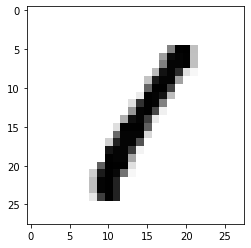

In [13]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[3],cmap=plt.cm.gray_r,interpolation="nearest") # showing an example of the available images
plt.show()

# KNN Algorithm

- The k-nearest neighbors algorithm (k-nn: for k-neighborrest neighbors in English) is a very intuitive, configurable and often powerful algorithm to deal with a problem of classification.
- The k-nn requires:
    * An integer k
    * A learning base
    * A metric for proximity

In [14]:
from time import time
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

In [16]:
indices = np.random.randint(70000, size=5000)
data = mnist.data[indices]
target = mnist.target[indices]

- Tests for the TP (with a train = 80 %)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

* Training a K-NN classifier with k = 10 using mnist dataset

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8, test_size=0.2)

clf = neighbors.KNeighborsClassifier(10)

clf.fit(xtrain,ytrain)
prediction = clf.predict(xtest)
score = clf.score(xtest, ytest)
# The image "4"
print("Prediction : {}, Value : {}, Efficacity : {}".format(prediction[4], ytest[4], score))

Prediction : 5, Value : 5, Efficacity : 0.925


> We have a score of 93%
>> The error rate is very low but at the same time we have a big data set

 Showing the forth image

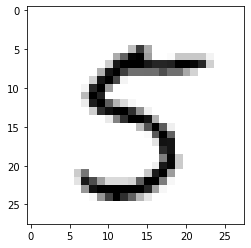

In [37]:
images = xtest.reshape((-1, 28, 28))
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

* Variation loop of k :

In [40]:
for k in range (2,16):
    clf = neighbors.KNeighborsClassifier(k)

    clf.fit(xtrain, ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    print("K = {}, Efficacity is : {}".format(k, score))


K = 2, Efficacity is : 0.915
K = 3, Efficacity is : 0.938
K = 4, Efficacity is : 0.925
K = 5, Efficacity is : 0.936
K = 6, Efficacity is : 0.931
K = 7, Efficacity is : 0.932
K = 8, Efficacity is : 0.929
K = 9, Efficacity is : 0.931
K = 10, Efficacity is : 0.925
K = 11, Efficacity is : 0.924
K = 12, Efficacity is : 0.921
K = 13, Efficacity is : 0.921
K = 14, Efficacity is : 0.913
K = 15, Efficacity is : 0.911


> We observe an efficiency peak between 3 and 9

* Variation loop of K with KFOLD :

In [43]:

mykf = KFold(14,shuffle = True)
mykf.get_n_splits(data)

k = 2

for train_index, test_index in mykf.split(data):

    
    xtrain, xtest = data[train_index], data[test_index]
    ytrain, ytest = target[train_index], target[test_index]

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain,ytrain)
    prediction = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    print("K = {}, Efficacity is : {}".format(k, score))

    k = k + 1

K = 2, Efficacity is : 0.8994413407821229
K = 3, Efficacity is : 0.9497206703910615
K = 4, Efficacity is : 0.9411764705882353
K = 5, Efficacity is : 0.938375350140056
K = 6, Efficacity is : 0.9215686274509803
K = 7, Efficacity is : 0.907563025210084
K = 8, Efficacity is : 0.9327731092436975
K = 9, Efficacity is : 0.896358543417367
K = 10, Efficacity is : 0.9439775910364145
K = 11, Efficacity is : 0.9215686274509803
K = 12, Efficacity is : 0.9103641456582633
K = 13, Efficacity is : 0.9411764705882353
K = 14, Efficacity is : 0.927170868347339
K = 15, Efficacity is : 0.9019607843137255


> Since the train set changes all the time, it's hard to compare rates efficiency between them for this loop ...> The results oscillate.

* Variation of training percent :

Training size = 0.2 %, Score = 0.87025 
Training size = 0.3 %, Score = 0.8877142857142857 
Training size = 0.4 %, Score = 0.904 
Training size = 0.5 %, Score = 0.9168 
Training size = 0.6 %, Score = 0.929 
Training size = 0.7 %, Score = 0.9253333333333333 
Training size = 0.8 %, Score = 0.924 
Training size = 0.9 %, Score = 0.956 


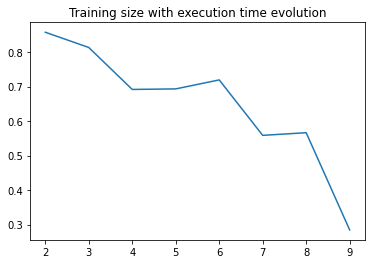

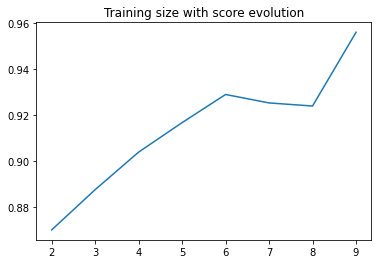

In [48]:
score=[]
execution_time=[]

values_of_t = range (2,10)

for t in values_of_t:

    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=(t/10))

    clasifier = neighbors.KNeighborsClassifier(3)

    begin = time()
    clasifier.fit(xtrain,ytrain)
    predicted = clasifier.predict(X=xtest)
    end = time()
    total_time = end - begin

    score.append(clasifier.score(xtest, ytest))
    execution_time.append(total_time)
    print("Training size = {} %, Score = {} ".format((t/10), clasifier.score(xtest, ytest)))
    #print("time: ", total_time)

plt.plot(values_of_t,execution_time)
plt.title("Training size with execution time evolution")
plt.show()
plt.plot(values_of_t,score)
plt.title("Training size with score evolution")
plt.show()

> As long as we increase training as long as we get better scores..

* Testing with n_jobs = 1 then -1 :

In [49]:
for i in [-1,1]:
    
    clf = neighbors.KNeighborsClassifier(7,n_jobs=i)

    clf.fit(xtrain, ytrain)
    time_start = time()
    prediction = clf.predict(xtest)
    time_stop = time()
    score = clf.score(xtest, ytest)
    print("n_jobs = {}, Total Time = {}".format(i,time_stop-time_start))

n_jobs = -1, Total Time = 3.2619545459747314
n_jobs = 1, Total Time = 0.2850005626678467


> Indeed, when we take all the available processes, things go faster!